In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
# Images are RGB
CHANNELS=3
EPOCHS=40

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/akip/Desktop/vgg16/daun jeruk",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 149 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['penyakit CVPD', 'penyakit kanker jeruk', 'ulat peliang']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0]


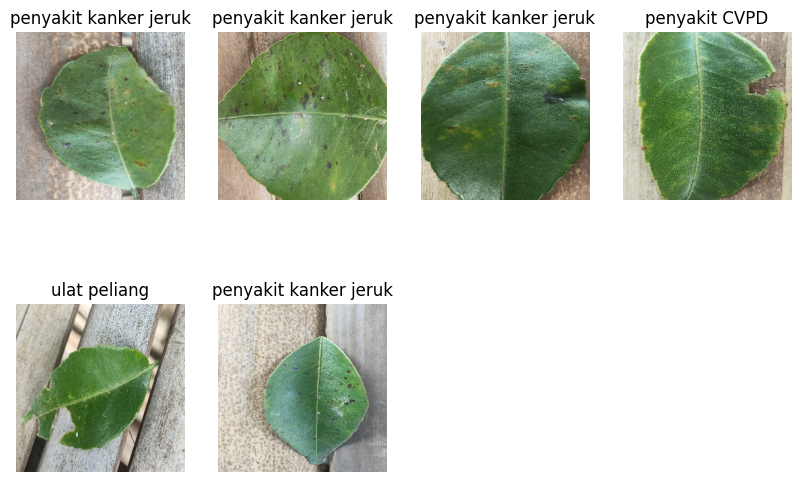

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

10

In [8]:
# 80% = training
# 10% validation
# 10% test
train_size = 0.8
len(dataset)*train_size

8.0

In [9]:
15*40

600

In [10]:
train_ds = dataset.take(30)
len(train_ds)

10

In [11]:
test_ds = dataset.skip(30)
len(test_ds)

0

In [12]:
val_size=0.1
len(dataset)*val_size

1.0

In [13]:
val_ds = test_ds.take(3)
len(val_ds)

0

In [14]:
test_ds = test_ds.skip(3)
len(test_ds)

0

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

8

In [18]:
len(val_ds)

1

In [19]:
len(test_ds)

1

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow import keras
# from tensorflow.keras.layers.experimental  import Resizing, Rescaling

IMAGE_SIZE = 256
resize_and_rescale = keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1./255),
])


In [22]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])


In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Assuming you have defined input_shape somewhere before this code snippet
input_shape = (224, 224, 3)  # Adjust the values based on your actual input shape
n_classes = 10  # Change this to the number of classes in your problem

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # Specify input shape here
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(n_classes, activation='softmax'))

# Build the model
model.build(input_shape=(None, *input_shape))


C:\Users\akip\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5


# Create the model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
# import keras.backend as K

# model = Sequential()
# n_classes = 5
# inputShape = (256, 256, 3)  # Update with your actual input shape
# chanDim = -1

# if K.image_data_format() == "channels_first":
#     inputShape = (3, 256, 256)  # Update with your actual input shape
#     chanDim = 1
# Model.add(Conv2D(32,(3,3),inputshape=,activation=‘relu′))
# Model.add(MaxPooling2D(pool_size=(2,2)))
# Model1.add(conv2D(32,(3,3),activation=‘relu′))
# Model.add(MaxPooling2D(poolsize=(2,2)))
# Model.add(Flattn())
# Model.add(Dense(units=128,activation=′softmax))

# model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))

C:\Users\akip\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (16, 256, 256, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (16, 254, 254, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (16, 254, 254, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (16, 127, 127, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (16, 125, 125, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (16, 125, 125, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (16, 62, 62, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (16, 60, 60, 64)          │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (16, 60, 60, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (16, 30, 30, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (16, 28, 28, 64)          │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (16, 28, 28, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (16, 14, 14, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (16, 12, 12, 64)          │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (16, 12, 12, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (16, 6, 6, 64)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (16, 4, 4, 64)            │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (16, 4, 4, 64)            │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (16, 2, 2, 64)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (16, 256)                 │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (16, 64)                  │     16,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (16, 64)                  │          

 Total params: 185,285 (723.77 KB)

 Trainable params: 184,581 (721.02 KB)

 Non-trainable params: 704 (2.75 KB)

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=40,
)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.2666 - loss: 2.3446 - val_accuracy: 0.5625 - val_loss: 1.5532
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 736ms/step - accuracy: 0.3546 - loss: 1.7301 - val_accuracy: 0.5625 - val_loss: 1.5099
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 729ms/step - accuracy: 0.4872 - loss: 1.3702 - val_accuracy: 0.5625 - val_loss: 1.4415
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 713ms/step - accuracy: 0.4457 - loss: 1.2347 - val_accuracy: 0.5625 - val_loss: 1.4619
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 0.3654 - loss: 1.3282 - val_accuracy: 0.5625 - val_loss: 1.5011
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step - accuracy: 0.4804 - loss: 1.1621 - val_accuracy: 0.5625 - val_loss: 1.4861
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 744ms/step - accuracy: 0.5072 - loss: 1.2195 - val_accuracy: 0.5625 - val_loss: 1.5413
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 737ms/step - accuracy: 0.5102 - loss: 1.1857 - val_accuracy: 0.5625 - val_loss

In [30]:
scores = model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.2500 - loss: 11.3652


In [31]:
scores

[11.36516284942627, 0.25]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 8}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
type(history.history['loss'])

list

In [36]:
len(history.history['loss'])

40

In [37]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.1907341480255127,
 1.692632794380188,
 1.3661901950836182,
 1.2676670551300049,
 1.2956326007843018]

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

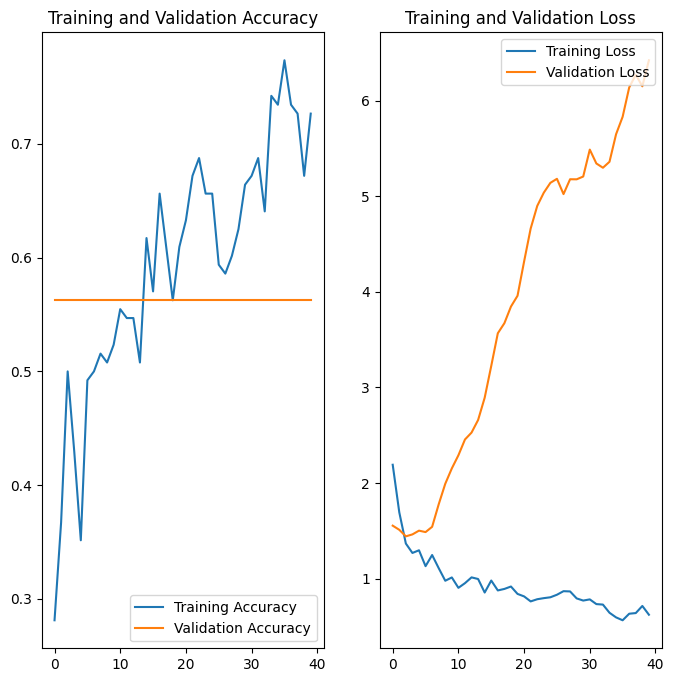

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: ulat peliang
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
predicted label: penyakit kanker jeruk


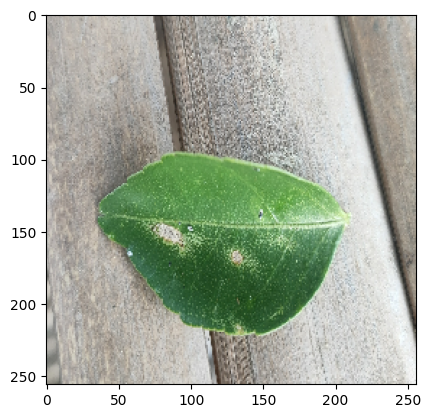

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


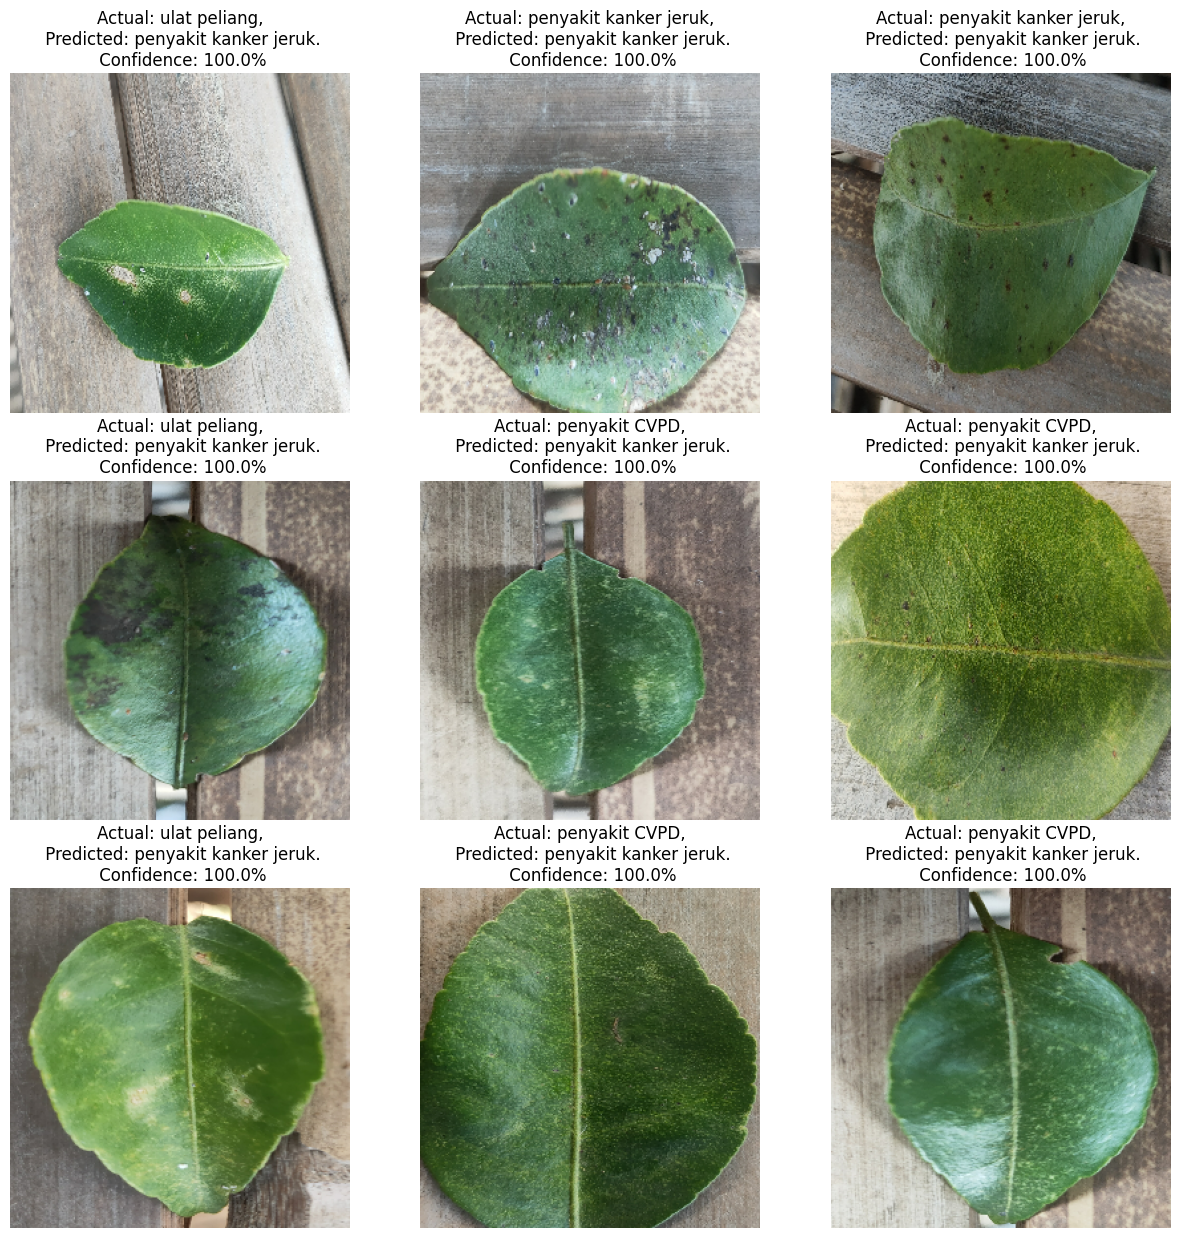

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [43]:
# import os
# model_version=max([int(i) for i in os.listdir("/kaggle/working/") + [0]])+1
# model.save(f"/kaggle/working/{model_version}")

In [44]:
# model.save("../citrus.h5")